### Lab Title: Customer Data Cleaning for Credit Card Fraud Detection 


#### Problem Statement:

The primary goal of this project is to preprocess and clean a dataset containing customer transaction data, which will be used for developing a credit card fraud detection system. The dataset presents several data quality issues that must be resolved to improve the reliability of machine learning models. These issues include:

Missing Data: Certain records in the dataset are incomplete, with key values missing, potentially affecting the accuracy and integrity of the analysis.
Duplicate Entries: The dataset contains repeated transaction records that need to be identified and removed to prevent them from impacting the results.
Outlier Values: Some transaction amounts or other features are extreme and deviate significantly from typical values, which could distort the performance of the model.

#### Objective:

- Handle Missing Values: Address and manage missing data to ensure a complete dataset.
- Remove Duplicates: Identify and eliminate duplicate records to avoid data redundancy.
- Address Outliers: Detect and handle extreme values that could affect model performance.
- Prepare Data for Modeling: Process and format the data for use in machine learning models.
- Build Fraud Detection Model: Ensure the data is ready to train a model that can accurately identify fraudulent transactions.


#### Requirements:
- Python installed (version 3.x recommended).
- Pandas and NumPy libraries installed (`pip install pandas numpy`).
- Jupyter Notebook (optional but recommended for running the lab).

In [23]:
# Import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#### Loading the Dataset

In [2]:
df=pd.read_csv("Customer_Transactions.csv")

In [3]:
df.size

27500

In [4]:
# **Part 1: Handling and Summarizing Missing Values **
# Handling missing data 
print(df.isnull().sum())
# Check the number of missing values in each column
print("\nAfter handling missing data once again check it as below")
print(df.isnull().sum())
# For percentage of missing values
missing=df.isnull().sum()/df.size
print(missing*100)


tranDate      0
custName      0
cardNum       0
zipCode       0
tranAmount    0
dtype: int64

After handling missing data once again check it as below
tranDate      0
custName      0
cardNum       0
zipCode       0
tranAmount    0
dtype: int64
tranDate      0.0
custName      0.0
cardNum       0.0
zipCode       0.0
tranAmount    0.0
dtype: float64


In [10]:
# **Part 2: Dropping Missing Values **
# Dropping Rows with Missing Data

# Drop rows with any missing values
df_drop=df.dropna()

# Drop rows with missing values only in a specific column
df_drop_col=df.dropna(subset=['cardNum','zipCode'],inplace=True)
df_drop_col1=df['cardNum'].dropna()

# Drop columns with any missing values
df_drop_it=df.dropna(axis=1)

# Drop columns where more than a certain percentage of values are missing
threshold = len(df)*0.3 # if more than 30% data is missing
df_cleaned = df.dropna(thresh=threshold,axis=1)
print(threshold)

1650.0


In [9]:
print("Dropping cardNum:",df_drop_col)
print(df_drop_col)

Dropping cardNum: None
None


In [7]:
# **Part 3: Filling Missing Values (Imputation) **


# Fill all missing values with a constant value, such as 0 or "Unknown"
df_numeric=df.fillna(0)
df_cat=df.fillna("Unknown")

In [8]:

df = df.drop_duplicates()

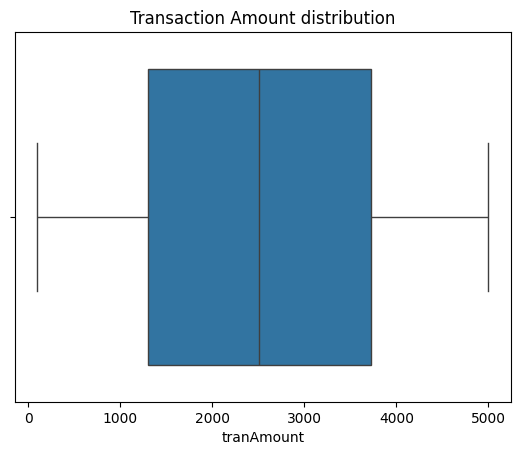

In [11]:
# **Part 4: Handling  and Visualizing Outliers **
# A box plot is a good way to identify potential outliers in the Amount column.

sns.boxplot(x=df['tranAmount'])
plt.title("Transaction Amount distribution")
plt.show()



In [12]:
df['tranAmount'].describe()

count    5500.000000
mean     2515.238545
std      1411.332226
min       100.000000
25%      1301.750000
50%      2504.000000
75%      3728.500000
max      4999.000000
Name: tranAmount, dtype: float64

<h2>Removing Outliers:</h2>

We can remove values that are outside a defined range (e.g., values that are 1.5 times the interquartile range above the 75th percentile or below the 25th percentile).

In [13]:
# **Part 5: Removing Outliers **
# We can remove values that are outside a defined range (e.g., values that are 1.5 times the interquartile range above the 75th percentile or below the 25th percentile).
Q1=df['tranAmount'].quantile(0.25)
Q3=df['tranAmount'].quantile(0.75)
IQR=Q3-Q1
IQR



np.float64(2426.75)

In [27]:
# **Part 6: Normalization and Standardization **
scaler=StandardScaler()
df['tranAmount']=scaler.fit_transform(df[['tranAmount']])



In [28]:
# **Part 7: Final Inspection and Ready for Modeling **

# Check for missing data again
print("Check for missing data again:\n",df.isnull().sum())

# Check for duplicates

print(" Check for duplicates:",df.duplicated().sum())

Check for missing data again:
 tranDate      0
custName      0
cardNum       0
zipCode       0
tranAmount    0
dtype: int64
 Check for duplicates: 0
